In [1]:
%matplotlib inline

/Users/viraj/.virtualenvs/salmon/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


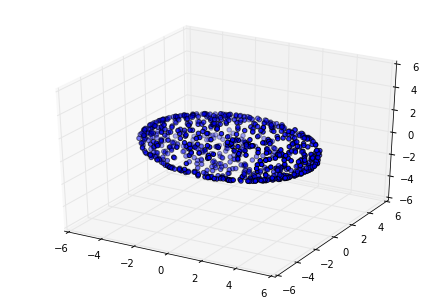

In [2]:
# generate a set of vector data with three principal components on x, y and z axes respectively
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import numpy as np
import random
import time
from math import sqrt, copysign

N = 800        # number of vectors to generate
a = 5
b = 3.5
c = 2

# empty argument defaults to using time for seed
random.seed(time.time())

"""
Equation for 'squashed' football (ellipsoid) with long axis along x, fat axis along y and squashed axis along z:

1 = x*x/a/a + y*y/b/b + z*z/c/c, where a > b > c > 0

"""

def surface(n):
    A2 = a*a
    B2 = b*b
    C2 = c*c

    cloud = []
    idx = 0
    while idx in range(0,n):
        idx += 1
        x = random.uniform(-a, a)
        xa = 1 - x*x/A2
        x2 = b * sqrt(xa)
        y = random.uniform(-x2, x2)
        z = c * sqrt(xa - y*y/B2)
        if random.uniform(-1,1) < 0 :
            z = -z
        cloud.append((x,y,z))
    return cloud

# ripped from: http://stackoverflow.com/questions/21161884/plotting-a-3d-surface-from-a-list-of-tuples-in-matplotlib?rq=1

data = surface(N)
x, y, z = zip(*data)
z = map(float, z)
# grid_x, grid_y = np.mgrid[min(x):max(x):100j, min(y):max(y):100j]
# grid_z = griddata((x, y), z, (grid_x, grid_y), method='cubic')

fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlim3d(-6,6)
ax.set_ylim3d(-6,6)
ax.set_zlim3d(-6,6)
ax.scatter(x,y,z)
plt.show()

In [19]:
# convert the list of 3-tuples generated as data into a numpy 3xN array
np_array_data = np.asarray(data).transpose()

#assign to all_samples for easier copypasta
all_samples = np_array_data

print np_array_data.shape

(3, 800)


('PC axes in terms of the measurement axes scaled by the standard deviations:\n', array([[ 0.67881674, -0.70410362,  0.20843687],
       [-0.2688634 ,  0.02582112,  0.96283215],
       [ 0.68331567,  0.70962762,  0.17177988]]))


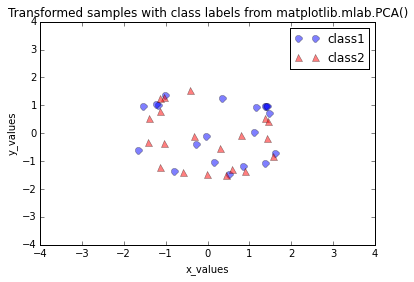

In [20]:
from matplotlib.mlab import PCA as mlabPCA

mlab_pca = mlabPCA(np_array_data.T)

print('PC axes in terms of the measurement axes scaled by the standard deviations:\n', mlab_pca.Wt)

plt.plot(mlab_pca.Y[0:20,0],mlab_pca.Y[0:20,1],
         'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(mlab_pca.Y[20:40,0], mlab_pca.Y[20:40,1],
         '^', markersize=7, color='red', alpha=0.5, label='class2')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()

In [21]:
mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])

mean_vector = np.array([[mean_x],[mean_y],[mean_z]])

print('Mean Vector:\n', mean_vector)

('Mean Vector:\n', array([[ 0.03567559],
       [-0.04939966],
       [-0.01474176]]))


In [22]:
scatter_matrix = np.zeros((3,3))
for i in range(all_samples.shape[1]):
    scatter_matrix += (all_samples[:,i].reshape(3,1) - mean_vector).dot(
        (all_samples[:,i].reshape(3,1) - mean_vector).T)
print('Scatter Matrix:\n', scatter_matrix)

('Scatter Matrix:\n', array([[  6.97687113e+03,  -2.64489719e+02,   6.55884722e+00],
       [ -2.64489719e+02,   2.18790303e+03,  -3.27588888e+01],
       [  6.55884722e+00,  -3.27588888e+01,   1.36830906e+03]]))


In [23]:
cov_mat = np.cov([all_samples[0,:],all_samples[1,:],all_samples[2,:]])
print('Covariance Matrix:\n', cov_mat)

('Covariance Matrix:\n', array([[  8.73200392e+00,  -3.31025931e-01,   8.20882005e-03],
       [ -3.31025931e-01,   2.73830167e+00,  -4.09998608e-02],
       [  8.20882005e-03,  -4.09998608e-02,   1.71252699e+00]]))


In [24]:
# eigenvectors and eigenvalues for the from the scatter matrix
eig_val_sc, eig_vec_sc = np.linalg.eig(scatter_matrix)

# eigenvectors and eigenvalues for the from the covariance matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:,i].reshape(1,3).T
    eigvec_cov = eig_vec_cov[:,i].reshape(1,3).T
    assert eigvec_sc.all() == eigvec_cov.all(), 'Eigenvectors are not identical'

    print('Eigenvector {}: \n{}'.format(i+1, eigvec_sc))
    print('Eigenvalue {} from scatter matrix: {}'.format(i+1, eig_val_sc[i]))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print('Scaling factor: ', eig_val_sc[i]/eig_val_cov[i])
    print(40 * '-')

Eigenvector 1: 
[[ 0.9984859 ]
 [-0.05498813]
 [ 0.00148498]]
Eigenvalue 1 from scatter matrix: 6991.44673743
Eigenvalue 1 from covariance matrix: 8.75024622958
('Scaling factor: ', 799.00000000000148)
----------------------------------------
Eigenvector 2: 
[[-0.05500343]
 [-0.99768119]
 [ 0.04008561]]
Eigenvalue 2 from scatter matrix: 2174.6375921
Eigenvalue 2 from covariance matrix: 2.72169911402
('Scaling factor: ', 799.00000000000023)
----------------------------------------
Eigenvector 3: 
[[  7.22692574e-04]
 [  4.01065922e-02]
 [  9.99195146e-01]]
Eigenvalue 3 from scatter matrix: 1366.99889918
Eigenvalue 3 from covariance matrix: 1.71088723302
('Scaling factor: ', 798.99999999999955)
----------------------------------------


In [25]:
for i in range(len(eig_val_sc)):
    eigv = eig_vec_sc[:,i].reshape(1,3).T
    np.testing.assert_array_almost_equal(scatter_matrix.dot(eigv),
                                         eig_val_sc[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)

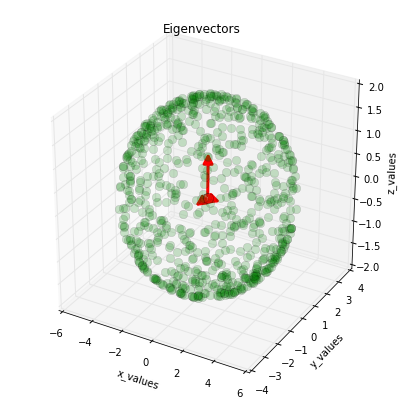

In [26]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(all_samples[0,:], all_samples[1,:], all_samples[2,:],
        'o', markersize=8, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z],
        'o', markersize=10, color='red', alpha=0.5)
for v in eig_vec_sc.T:
    a = Arrow3D([mean_x, v[0]+mean_x],
                [mean_y, v[1]+mean_y],
                [mean_z, v[2]+mean_z],
                mutation_scale=20, lw=3, arrowstyle="-|>", color="r")

    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()